In [68]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from tqdm import trange, tqdm
def rho_frw(t):
    return 25
def rho(r,t):
    r_h=0.042
    A=50.59
    r_M=0.037
    sig=r_h/10
    eps=0.0025

    if r> r_h:
        return rho_frw(t)
    else:
        return A*np.exp(-1*(r-r_M)**2/(2*sig**2))+eps
def intg(r,t):
    return rho(r,t)*r**2

def H_frw(t):
    return np.sqrt((4/9)*rho_frw(t))
def rho_bar(r,t):
    temp=quad(intg, 0, r,args=t)[0]
    temp=temp*3/r**3
    return temp

def M(r):
    r=np.abs(r)
    t=1
    temp=rho_bar(r,t)*r**3*4/3*np.pi
    return temp
def dM(r):
    dr=0.001
    return (M(r+dr/2)-M(r-dr/2))/dr

def E(r):
    r=np.abs(r)
    t=1
    temp=1/2*H_frw(t)**2*r**2-1/(6*np.pi)*M(r)/r
    return temp

def dE(r):
    dr=0.001
    return (E(r+dr/2)-E(r-dr/2))/dr

def dYdr(Y,r):
    dr=r[2]-r[0]
    Y=np.insert(Y, 0, Y[0], axis=0)
    Y=np.append(Y,Y[len(Y)-1])
    temp=[]
    for i in range(len(r)):
        t=(Y[i+2]-Y[i])/dr
        temp.append(t)
    return temp


Flat Case

In [3]:
def t_hat(r,t_bar):
    return t_bar-rho_bar(r,t_bar)**(-1/2)
def Y(r,t):
    t_bar=-0.8
    temp=(3*M(r)/(4*np.pi))**(1/3)*(t-t_hat(r,t_bar))**(2/3)
    return temp

Plot for $\bar{\rho}(r,\bar{t})$ and $\rho(r,\bar{t})$

C:\Users\87588\AppData\Local\Temp\ipykernel_40260\2921982536.py:25: RuntimeWarning: invalid value encountered in scalar divide
  temp=temp*3/r**3


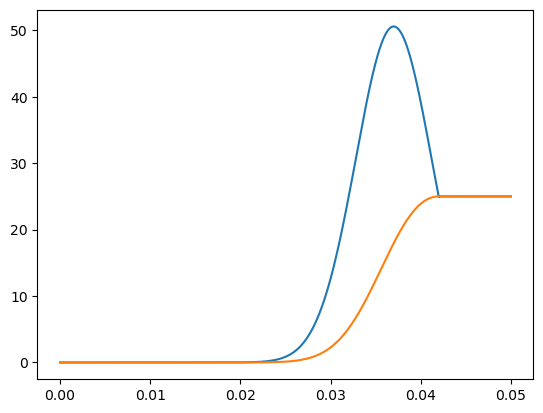

In [4]:
r=np.linspace(0, 0.05,10000)
t=1
I=[]
for i in range(0,len(r)):
    #temp=quad(intg, 0, r[i],args=t)[0]
    #temp=temp*3/r[i]**3
    #I.append(temp)
    I.append(rho_bar(r[i],t))
I=np.array(I)
rplot=[]
for i in range(0,len(r)):
    rplot.append(rho(r[i], t))

plt.figure()
plt.plot(r,rplot)
plt.plot(r,I)

C:\Users\87588\AppData\Local\Temp\ipykernel_40260\2921982536.py:25: RuntimeWarning: invalid value encountered in scalar divide
  temp=temp*3/r**3


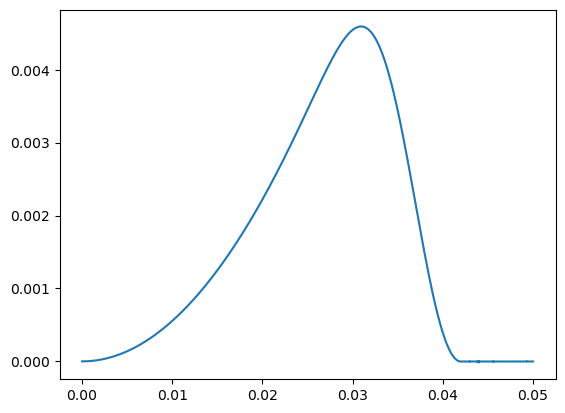

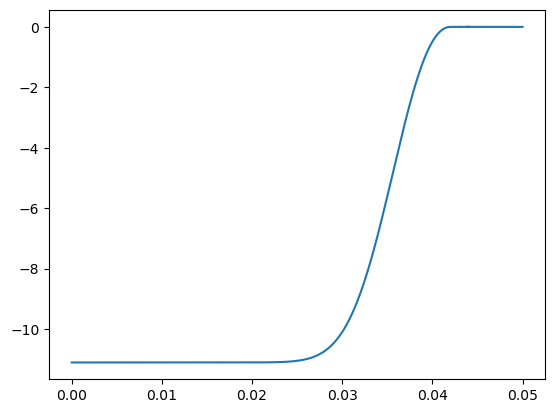

In [5]:
r=np.linspace(0, 0.05,10000)
E1=[]
for i in range (0,len(r)):
    E1.append(E(r[i]))
E1=np.array(E1)
K1=-2*E1/r**2
plt.figure()
plt.plot(r,E1)
plt.figure()
plt.plot(r,K1)

Dynamics of the Swiss Cheese Model(Flat case with $k=0$)

C:\Users\87588\AppData\Local\Temp\ipykernel_40260\2890690940.py:25: RuntimeWarning: invalid value encountered in scalar divide
  temp=temp*3/r**3


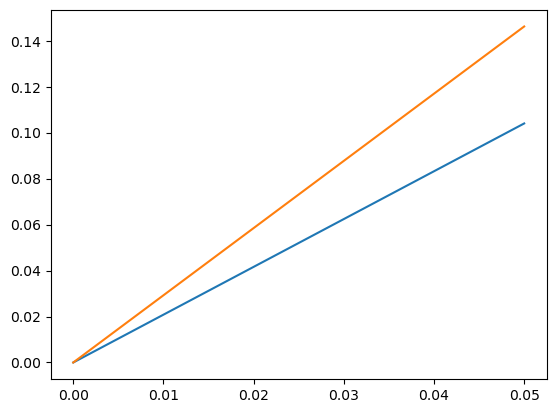

In [54]:
r=np.linspace(0, 0.05,10000)
t_bar=-0.8
t1=0
t2=-0.4
t3=-0.8
Y1=[]
Y2=[]
Y3=[]
for i in range (0,len(r)):
    Y1.append(Y(r[i],t1))
    Y2.append(Y(r[i],t2))
    Y3.append(Y(r[i],t3))
plt.figure()
#plt.plot(r,Y1)
#plt.plot(r,Y2)
#plt.plot(r,Y3)
plt.plot(r,r*(t2+1)**(2/3)/(t_bar+1)**(2/3))
plt.plot(r,r*(t1+1)**(2/3)/(t_bar+1)**(2/3))

In [7]:
from scipy.integrate import odeint
def dYdt(y,t,r):
    temp=M(r)/(3*np.pi)*(1/y)+2*E(r)
    return np.sqrt(temp)
solY2d=[]
soldY2dt=[]
r1=np.linspace(0.0001,0.1,1000)
t =np.linspace(-0.8,1.6,1000)
for i in tqdm(range(len(r1))):
    r_int=r1[i]
    sol = odeint(dYdt, r1[i], t, args=(r1[i],))
    temp=[]
    for j in range(len(sol)):
        temp.append(sol[j][0])
    solY2d.append(temp)

solY2d=np.array(solY2d)
solY2dt=np.transpose(solY2d)

for i in tqdm(range(len(t))):
    temp=[]
    for j in range(len(r1)):
        temp.append(dYdt(solY2dt[i][j],t[i],r1[j]))
    soldY2dt.append(temp)
soldY2dt=np.array(soldY2dt)
soldY2d=np.transpose(soldY2dt)
solY2d=np.array(solY2d)
solY2dt=np.transpose(solY2d)
print(soldY2d)

100%|██████████| 1000/1000 [06:09<00:00,  2.71it/s]

[[3.33333333e-04 3.33333201e-04 3.33333071e-04 ... 3.33318522e-04
  3.33318520e-04 3.33318518e-04]
 [6.66666667e-04 6.66666402e-04 6.66666141e-04 ... 6.66637043e-04
  6.66637040e-04 6.66637036e-04]
 [1.00000000e-03 9.99999603e-04 9.99999212e-04 ... 9.99955565e-04
  9.99955560e-04 9.99955555e-04]
 ...
 [3.32666667e-01 3.31345215e-01 3.30044506e-01 ... 1.41563171e-01
  1.41519513e-01 1.41475909e-01]
 [3.33000000e-01 3.31677224e-01 3.30375211e-01 ... 1.41704991e-01
  1.41661289e-01 1.41617641e-01]
 [3.33333333e-01 3.32009234e-01 3.30705918e-01 ... 1.41846894e-01
  1.41803148e-01 1.41759456e-01]]


-0.8


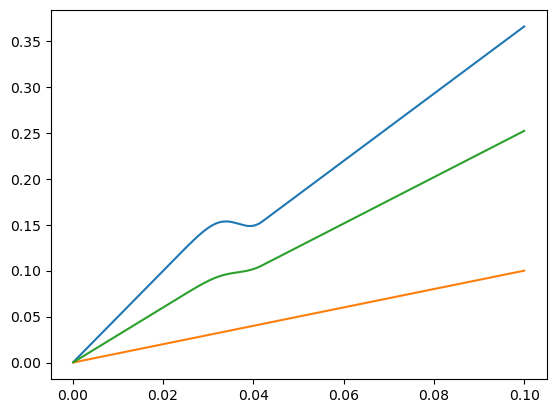

In [8]:
t2=t[250]
plt.plot(r1,solY2dt[499])
plt.plot(r1,solY2dt[0])
plt.plot(r1,solY2dt[250])
#plt.plot(r,Y3)
#plt.plot(r,r*(t2+1)**(2/3)/(t_bar+1)**(2/3))
#plt.plot(r,r*(t1+1)**(2/3)/(t_bar+1)**(2/3))
print(t[0])

1000 1000 1000


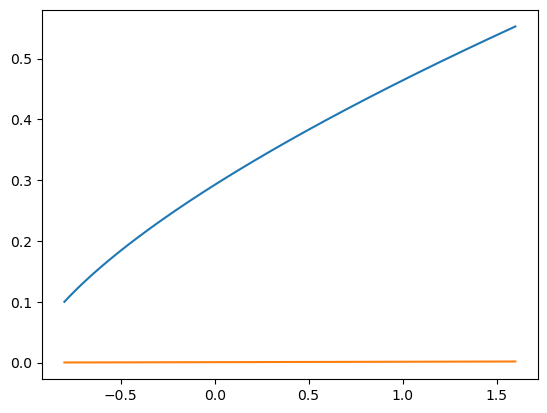

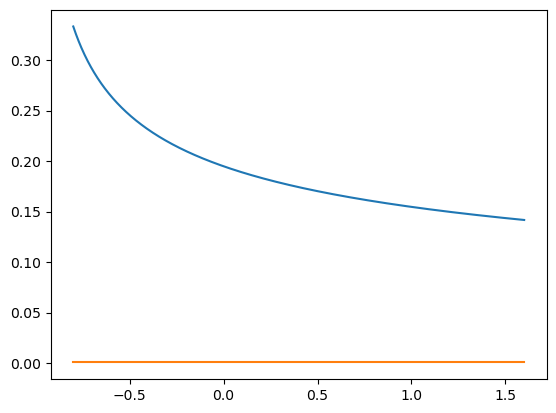

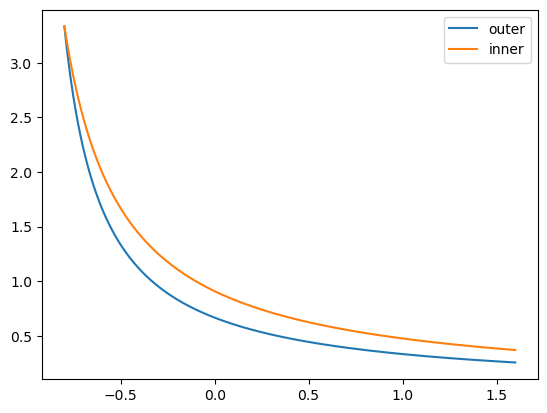

In [9]:

slice=1
H=soldY2d/solY2d
plt.figure()
plt.plot(t,solY2d[len(r1)-1])
plt.plot(t,solY2d[slice])
plt.figure()
plt.plot(t,soldY2d[len(r1)-1])
plt.plot(t,soldY2d[slice])

print(len(r1),len(H[0]),len(t))
plt.figure()
plt.plot(t,H[len(r1)-1],label='outer')
plt.plot(t,H[slice],label='inner')
plt.legend()

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\87588\AppData\Local\Temp\ipykernel_40260\2921982536.py:25: RuntimeWarning: invalid value encountered in scalar divide
  temp=temp*3/r**3
100%|██████████| 1000/1000 [00:00<00:00, 4534.38it/s]


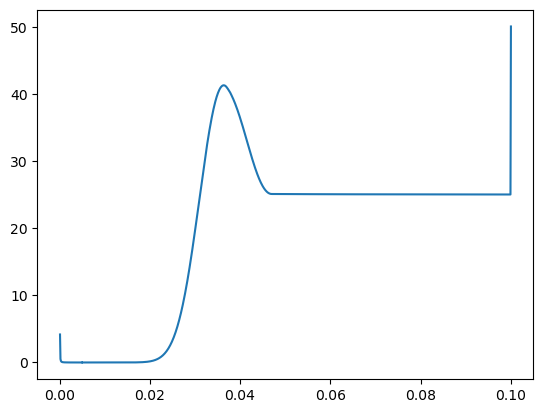

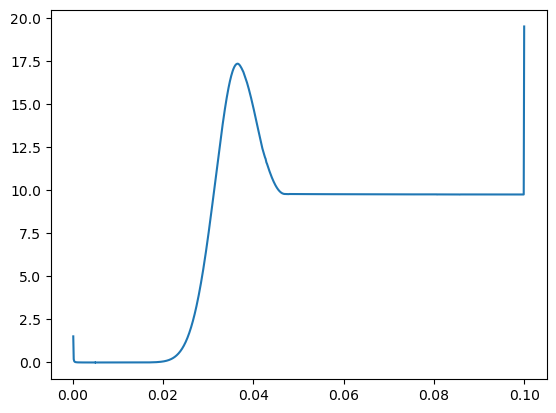

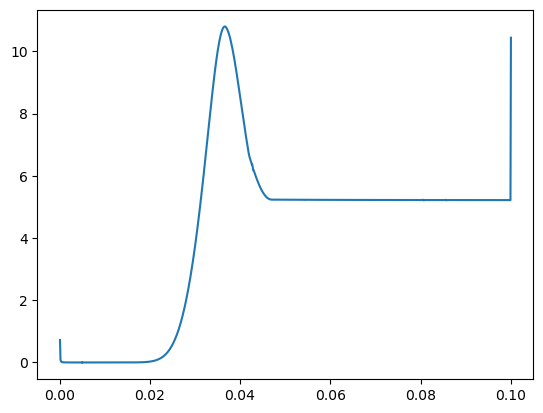

In [10]:
dM2dt=[]
for i in tqdm(range(len(t))):
    temp=[]
    for j in range(len(r1)):
        temp.append(dM(r1[j]))
    dM2dt.append(temp)
dM2dt=np.array(dM2dt)

dYdRt=[]
for i in tqdm(range(len(solY2dt))):
    dYdRt.append(dYdr(solY2dt[i],r1))
dYdRt=np.array(dYdRt)
rho1=dM2dt/(4*np.pi*solY2dt**2*dYdRt)
plt.figure()
plt.plot(r1,rho1[0])
plt.figure()
plt.plot(r1,rho1[50])
plt.figure()
plt.plot(r1,rho1[99])


In [166]:
'''
r1=np.linspace(0.0001,0.05,500)
t1 =np.linspace(-0.8,0,500)
solY2dt[t][r]
'''
def dYdt1(y,t,r):
    temp=M(r)/(3*np.pi)*(1/y)+2*E(r)
    return np.sqrt(temp)

flipsol=np.flip(solY2dt,1)
rtemp=-np.flip(r1)
YsingleOld=np.concatenate((flipsol, solY2dt), axis=1)
rsingle=np.concatenate((rtemp, r1))
t2=t
tstep=(t2[len(t2)-1]-t2[0])/len(t2)
rstep=(rsingle[len(rsingle)-1]-rsingle[0])/len(rsingle)
rstep=rstep
Ysingle=[]
for i in range(len(rsingle)):
    if(rsingle[i]<0 and rsingle[i+1]>0):
        rsingle=np.insert(rsingle,i+1,0)
        for j in range(len(YsingleOld)):
            Ysingle.append(np.insert(YsingleOld[j],i+1,0))
Ysingle=np.array(Ysingle)
'''
def Ysinglef(r,t):
    for i in range(len(rsingle)-1):
        if (r>=rsingle[i] and r<rsingle[i+1]):
            rindex=i
            #print(i,1)
    for i in range(len(t2)-1):
        if (t>=t2[i] and t<t2[i+1]):
            tindex=i
            #print(i,2)
    #print(rindex,tindex)
    dydr=(Ysingle[tindex][rindex+1]-Ysingle[tindex][rindex])/(rsingle[rindex+1]-rsingle[rindex])
    dydt=(Ysingle[tindex+1][rindex]-Ysingle[tindex][rindex])/(t2[tindex+1]-t2[tindex])
    delta=dydr*(r-rsingle[rindex])+dydt*(t-t2[tindex])
    #print("done")
    return Ysingle[tindex][rindex]+delta
'''
def Ysinglef(r,t):
    r1=np.abs(r)
    ttemp=np.linspace(-0.8,t,200)
    sol = odeint(dYdt1, r1, ttemp, args=(r1,))
    return sol[len(sol)-1][0]
c=0

def W(r):
    return np.sqrt(2*E(np.absolute(r))+1)

def dYdr(r,t):
    return (Ysinglef(r+rstep/2,t)-Ysinglef(r-rstep/2,t))/rstep

def dYdrdt(r,t):
    return (dYdr(r,t+tstep/2)-dYdr(r,t-tstep/2))/tstep

def dYdt(r,t):
    return (Ysinglef(r,t+tstep/2)-Ysinglef(r,t-tstep/2))/tstep
'''
def dYdr(r,t):
    return (Ysinglef(r+rstep,t)-Ysinglef(r,t))/rstep

def dYdrdt(r,t):
    return (dYdr(r,t+tstep)-dYdr(r,t))/tstep

def dYdt(r,t):
    return (Ysinglef(r,t+tstep)-Ysinglef(r,t))/tstep
'''
def dzdl(z,r,t):
    c=1e-2
    temp=-1*(dYdrdt(r,t)/dYdr(r,t))*((z+1)**2-(c/Ysinglef(r,t))**2)-c**2*(dYdt(r,t)/Ysinglef(r,t)**3)
    if (r<0):
        return temp
    if (r>=0):
        return temp

def dtdl(z,r,t):
    temp=z+1
    if (r<0):
        return temp
    if (r>=0):
        return temp

def drdl(z,r,t):
    c=1e-2
    #return -1*np.abs(W(r)/dYdr(r,t)*np.sqrt(((z+1)**2-(c/Ysinglef(r,t))**2)))
    temp=W(r)/dYdr(r,t)*np.sqrt(np.abs(((z+1)**2-(c/Ysinglef(r,t))**2)))
    if (r<0):
        return temp
    if (r>=0):
        return -1*temp

def dpdl(z,r,t):
    c=1e-2
    return c/Ysinglef(r,t)**2

#initial value
ztemp=0
rtemp=0.042
ttemp=0
ltemp=0
ptemp=np.pi
lstep=1/10000


def evo(zi,ri,ti,pi):
    return zi+dzdl(zi,ri,ti)*lstep, ri+drdl(zi,ri,ti)*lstep, ti+dtdl(zi,ri,ti)*lstep, pi+dpdl(zi,ri,ti)
    

Z=[]
T=[]
R=[]
l=[]
P=[]
for i in tqdm(range(0,3500)):
    ztemp,rtemp,ttemp,ptemp=evo(ztemp,rtemp,ttemp,ptemp)
    ltemp=ltemp+lstep
    Z.append(ztemp)
    R.append(rtemp)
    T.append(ttemp)
    l.append(ltemp)
    P.append(ptemp)
    
    

100%|██████████| 3500/3500 [01:25<00:00, 41.14it/s]


'\nYtemp=[]\nfor i in range(len(l)):\n    Ytemp.append(Ysinglef(R[i],T[i]))\nplt.figure()\nplt.plot(l,Ytemp)\n\ntemp=[]\ntemp2=[]\ntemp3=[]\nltemp=[]\nfor i in range(len(l)-1):\n    ltemp.append(l[i])\nfor i in range(len(l)-1):\n    temp.append(W(R[i]))\nfor i in range(len(l)-1):\n    temp2.append(drdl(Z[i],R[i],T[i]))\nfor i in range(len(l)-1):\n    temp3.append(dYdr(R[i],T[i]))\nplt.figure()\nplt.plot(ltemp,temp2)\nplt.figure()\nplt.plot(ltemp,temp3)\nplt.figure()\nplt.plot(ltemp,temp)\n'

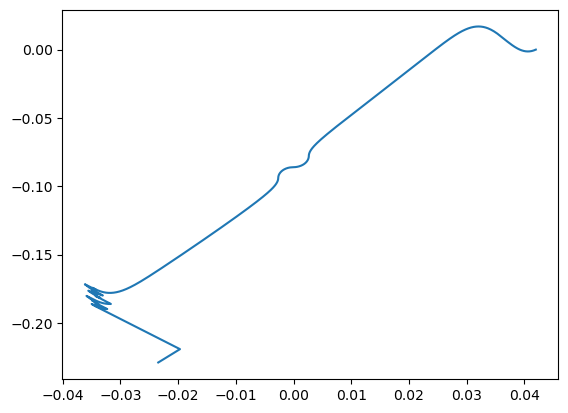

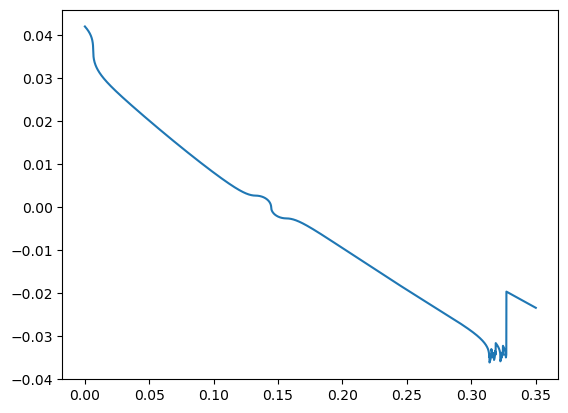

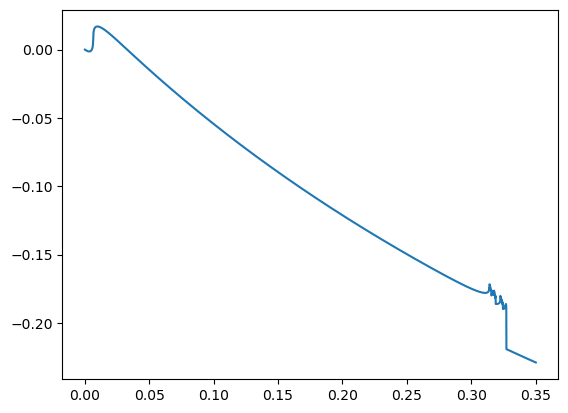

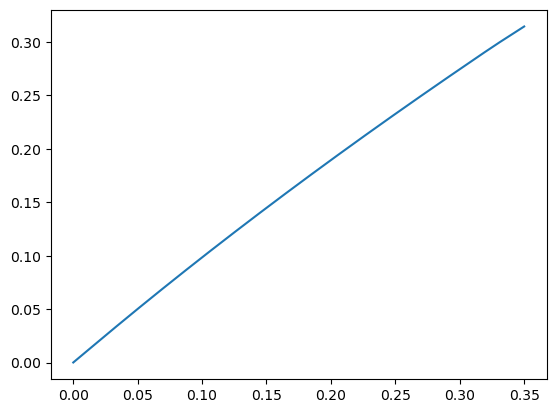

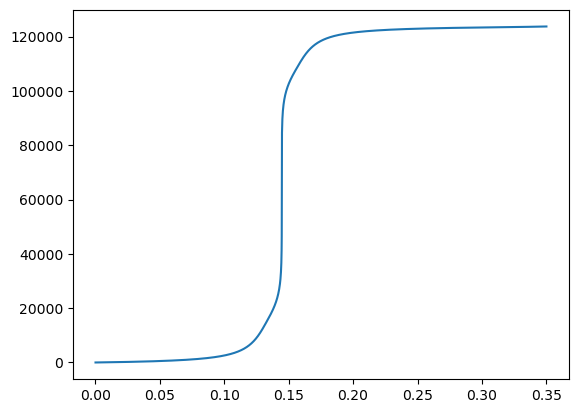

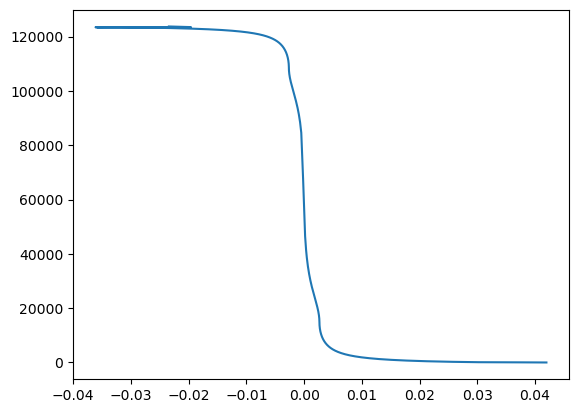

In [167]:
#plt.ylim([-0.05,0.2])
plt.figure()
plt.plot(R,Z)
plt.figure()
plt.plot(l,R)
plt.figure()
plt.plot(l,Z)
plt.figure()
plt.plot(l,T)
plt.figure()
plt.plot(l,P)
plt.figure()
plt.plot(R,P)



'''
Ytemp=[]
for i in range(len(l)):
    Ytemp.append(Ysinglef(R[i],T[i]))
plt.figure()
plt.plot(l,Ytemp)

temp=[]
temp2=[]
temp3=[]
ltemp=[]
for i in range(len(l)-1):
    ltemp.append(l[i])
for i in range(len(l)-1):
    temp.append(W(R[i]))
for i in range(len(l)-1):
    temp2.append(drdl(Z[i],R[i],T[i]))
for i in range(len(l)-1):
    temp3.append(dYdr(R[i],T[i]))
plt.figure()
plt.plot(ltemp,temp2)
plt.figure()
plt.plot(ltemp,temp3)
plt.figure()
plt.plot(ltemp,temp)
'''

In [13]:
print(rsingle[0],rsingle[len(rsingle)-1],len(rsingle))
print(t2[0],t2[len(t2)-1],len(t2))
print(rsingle[999])
print(rstep)
print(rtemp)

-0.1 0.1 2001
-0.8 1.6 1000
-0.0001
0.0001
0.05007009714739006


In [14]:
#testbench


rt=R[len(R)-100]
tt=T[len(T)-100]
zt=Z[len(Z)-100]
print(rsingle)
print(rt,tt)
print("W:",W(rt))
print("dYdr:",dYdr(rt,tt))
print("dYdrdt:",dYdrdt(rt,tt))
print("dYdt:",dYdt(rt,tt))
print("Ysinglef:",Ysinglef(rt+rstep,tt),Ysinglef(rt,tt))
print(rt,tt)
print("drdl:",drdl(zt,rt,tt))
print("dzdl:",dzdl(zt,rt,tt))
print("dtdl:",dtdl(zt,rt,tt))
print("rstep:",rstep)


[-0.1    -0.0999 -0.0998 ...  0.0998  0.0999  0.1   ]
0.047619593927204495 -0.23928937379563978
W: 0.9999982442259375
dYdr: 2.4355159818785497
dYdrdt: 2.1321303580897526
dYdt: 0.1016786136004942
Ysinglef: 0.1162725979117327 0.1160290356518631
0.047619593927204495 -0.23928937379563978
drdl: -0.492750770380096
dzdl: -1.2608426368005548
dtdl: 1.2001044834560157
rstep: 0.0001


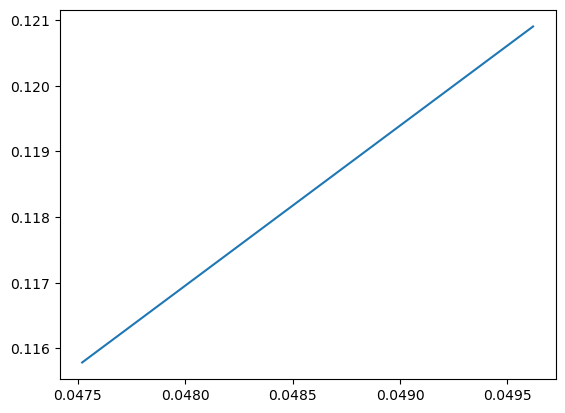

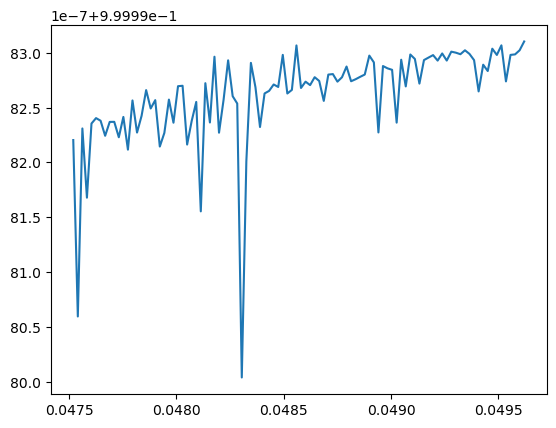

In [15]:
temp=[]
temp2=[]
rtt=np.linspace(rt-rstep,rt+20*rstep,100)
for i in range(len(rtt)):
    temp.append(Ysinglef(rtt[i],tt))
for i in range(len(rtt)):
    temp2.append(W(rtt[i]))
plt.plot(rtt,temp)
plt.figure()
plt.plot(rtt,temp2)

In [16]:
print(YsingleOld[99])

[0.16859903 0.16843043 0.16826183 ... 0.16826183 0.16843043 0.16859903]


In [110]:
#new method
from scipy.integrate import odeint
def dYdt(y,t,r):
    temp=M(r)/(3*np.pi)*(1/y)+2*E(r)
    return np.sqrt(temp)
def pYpt(r,t,y):
    temp=M(r)/(3*np.pi)*(1/y)+2*E(r)
    temp=np.sqrt(temp)
    return temp
def pYpr(r,t):
    tempstep=0.001
    tspace = np.linspace(-0.8,t,100)
    r0=r-tempstep/2
    r1=r+tempstep/2
    sol=odeint(dYdt, r0, tspace, args=(r0,))
    sol0=sol[len(sol)-1][0]
    sol=odeint(dYdt, r0, tspace, args=(r1,))
    sol1=sol[len(sol)-1][0]
    return (sol1-sol0)/r1-r0
def p2Yprpt(r,t,y):
    temp=dM(r)/(3*np.pi*y)-M(r)/(3*np.pi*y**2)*pYpr(r,t)+2*dE(r)
    return temp

def dzdl(z,r,t,y,c):
    temp1=-(p2Yprpt(r,t,y)/pYpr(r,t))
    temp2=(z+1)**2-c**2/y**2
    temp3=-c**2*pYpt(r,t,y)/y**3
    return temp1*temp2+temp3

def dtdl(z):
    return z+1

def drdl(z,r,t,y,c):
    temp1=W(r)/pYpr(r,t)
    temp2=(z+1)**2-c**2/y**2
    return temp1*np.sqrt(temp2)

def dpdl(y,c):
    return c/y**2


def newevo(zi,ri,ti,pi,yi,c):
    d=0.0001
    tempz=zi-d*dzdl(zi,ri,ti,yi,c)
    tempr=ri-d*drdl(zi,ri,ti,yi,c)
    tempt=ti-d*dtdl(zi)
    tempp=pi-d*dpdl(yi,c)
    tempy=yi-(d*drdl(zi,ri,ti,yi,c)*pYpr(ri,ti)+d*dtdl(zi)*pYpt(ri,ti,yi))
    return tempz, tempr, tempt, tempp, tempy


def singlehole(zI,rI,tI,pI,yI,c,evotime):
    ltemp=0
    lstep=1/20000
    l=[]
    Y=[]
    Z=[]
    R=[]
    T=[]
    for i in tqdm(range(0,evotime)):
        Z.append(zI)
        R.append(rI)
        T.append(tI)
        l.append(ltemp)
        P.append(pI)
        Y.append(yI)
        zI,rI,tI,pI,yI=newevo(zI,rI,tI,pI,yI,c)
        ltemp=ltemp+lstep
    return [l,Z,R,T,Y]


zint=0
rint=-0.042
tint=0
pint=0
yint=np.abs(rint*(tint+1)**(2/3)/(t_bar+1)**(2/3))
print(yint)
test=singlehole(zint,rint,tint,pint,yint,0,1000)






0.1228087450049404


  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\87588\AppData\Local\Temp\ipykernel_40260\3040731778.py:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(temp)
100%|██████████| 1000/1000 [00:21<00:00, 45.87it/s]


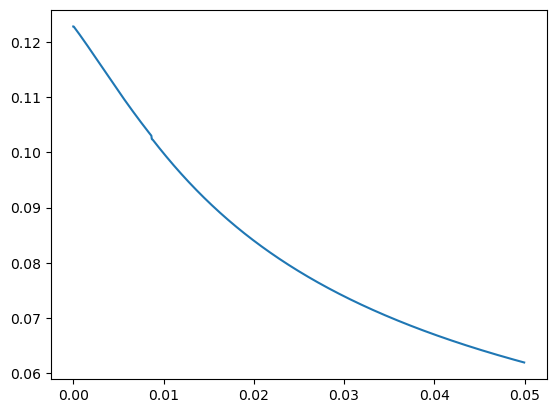

In [97]:
plt.figure()
plt.plot(test[0],test[4])

In [ ]:
tempstep=0.001
tspace = np.linspace(-0.8,t,200)
r0=r-tempstep/2
r1=t+tempstep/2
sol=odeint(dYdt, r0, t, args=(r0,))
sol0=sol[len(sol)-1]
sol=odeint(dYdt, r0, t, args=(r1,))
sol1=sol[len(sol)-1]
return (sol1-sol0)/r1-r0
